### Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Preprocessing

In [19]:
#loading the data from csv to pandas dataframe

bigmart_data = pd.read_csv("train_v9rqX0R.csv")
bigmart_data.head()

#Label or Target variable --> Item_Outlet_Sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
bigmart_data.shape  #data points and features

(8523, 12)

In [21]:
bigmart_data.dtypes  #Data types of the columns

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [22]:
bigmart_data.isnull().sum()   #Missing value count in all the columns

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Handling missing values

In [23]:
#Mean value imputation for numerical column Item_Weight

mean_weight = bigmart_data["Item_Weight"].mean()

bigmart_data["Item_Weight"].fillna(mean_weight,inplace = True)

In [24]:
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
#Mode value imputation for categorical column Outlet_Size

mode_outlet_size = bigmart_data.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0] ))

In [26]:
mode_outlet_size  #Mode value of Outlet_Size for each of the different Outlet_Type are shown as they are correlated.

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [27]:
missing_values = bigmart_data["Outlet_Size"].isnull() #gives a list of True or False

In [28]:
bigmart_data.loc[missing_values, 'Outlet_Size'] = bigmart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size)

In [29]:
bigmart_data.isnull().sum()   #Missing values are handled


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Exploratory Data Analysis

In [30]:
bigmart_data.describe()   #statistics on the numerical features of the data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
 #Plots with numerical features
    
sns.set()   #creating theme for the plots

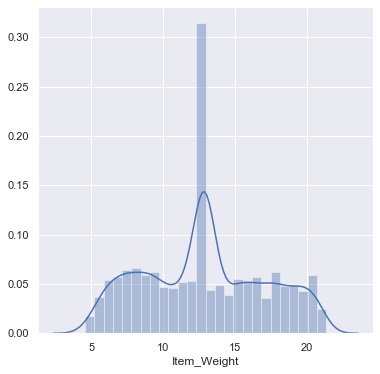

In [33]:
#Item weight distribution

plt.figure(figsize=(6,6))
sns.distplot(bigmart_data["Item_Weight"])
plt.show()

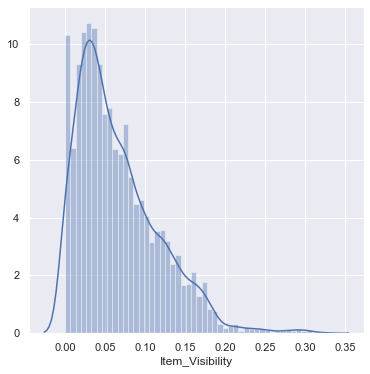

In [34]:
#Item visibility distribution
#the plot is skewed
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data["Item_Visibility"])
plt.show()

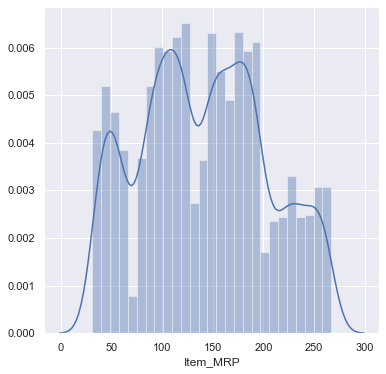

In [35]:
#Item MRP distribution --> Not a normal distribution

plt.figure(figsize=(6,6))
sns.distplot(bigmart_data["Item_MRP"])
plt.show()

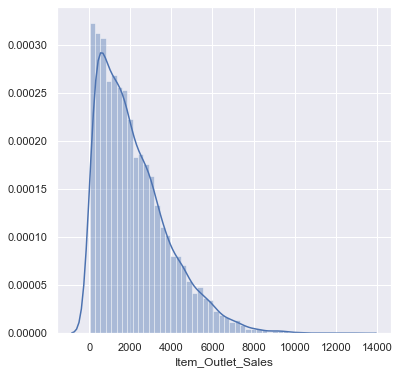

In [36]:
#Item outlet sales distribution

plt.figure(figsize=(6,6))
sns.distplot(bigmart_data["Item_Outlet_Sales"])
plt.show()

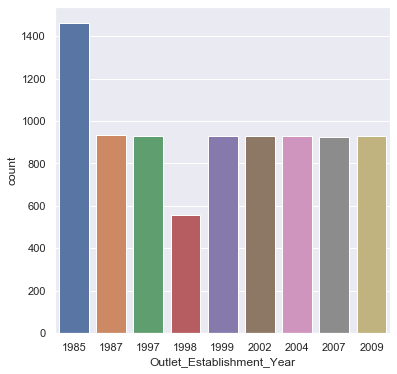

In [37]:
#count plot for outlet establishment year

plt.figure(figsize=(6,6))
sns.countplot(x = "Outlet_Establishment_Year",data=bigmart_data)
plt.show()

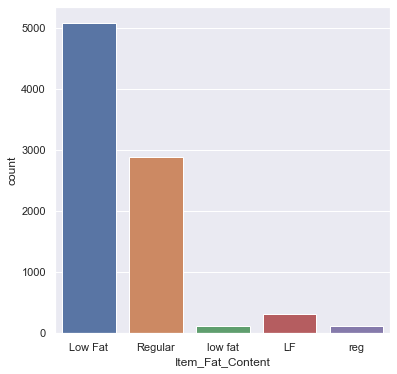

In [38]:
#Categorical features plots except ID columns

#fat content of Items
plt.figure(figsize=(6,6))
sns.countplot(x = "Item_Fat_Content",data=bigmart_data)
plt.show()

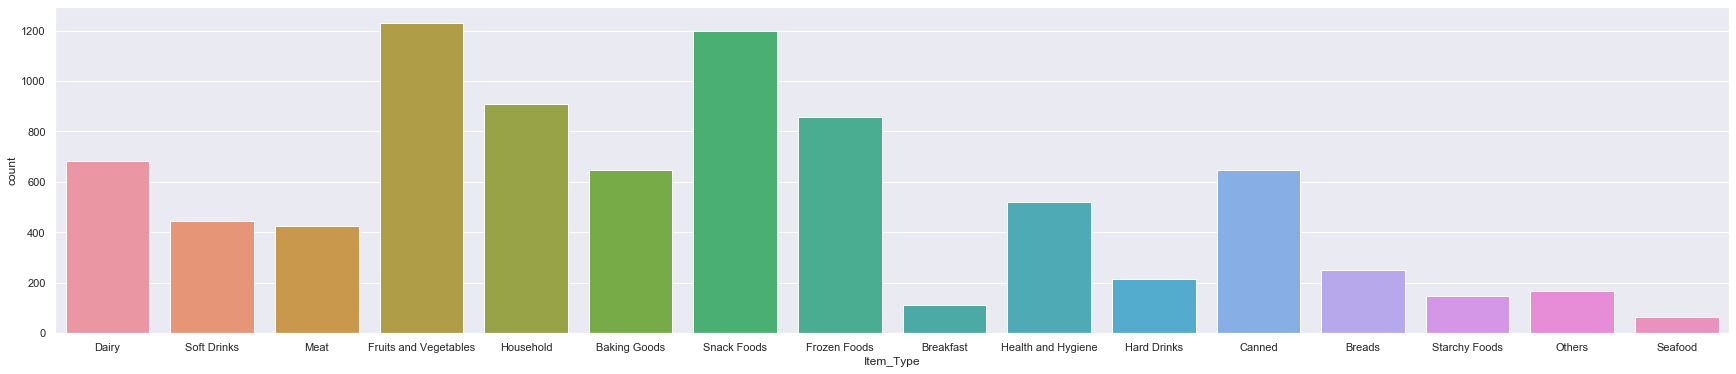

In [42]:
plt.figure(figsize=(30,6))
sns.countplot(x = "Item_Type",data=bigmart_data)
plt.show()

In [55]:
bigmart_data["Outlet_Size"]=bigmart_data["Outlet_Size"].apply(str)

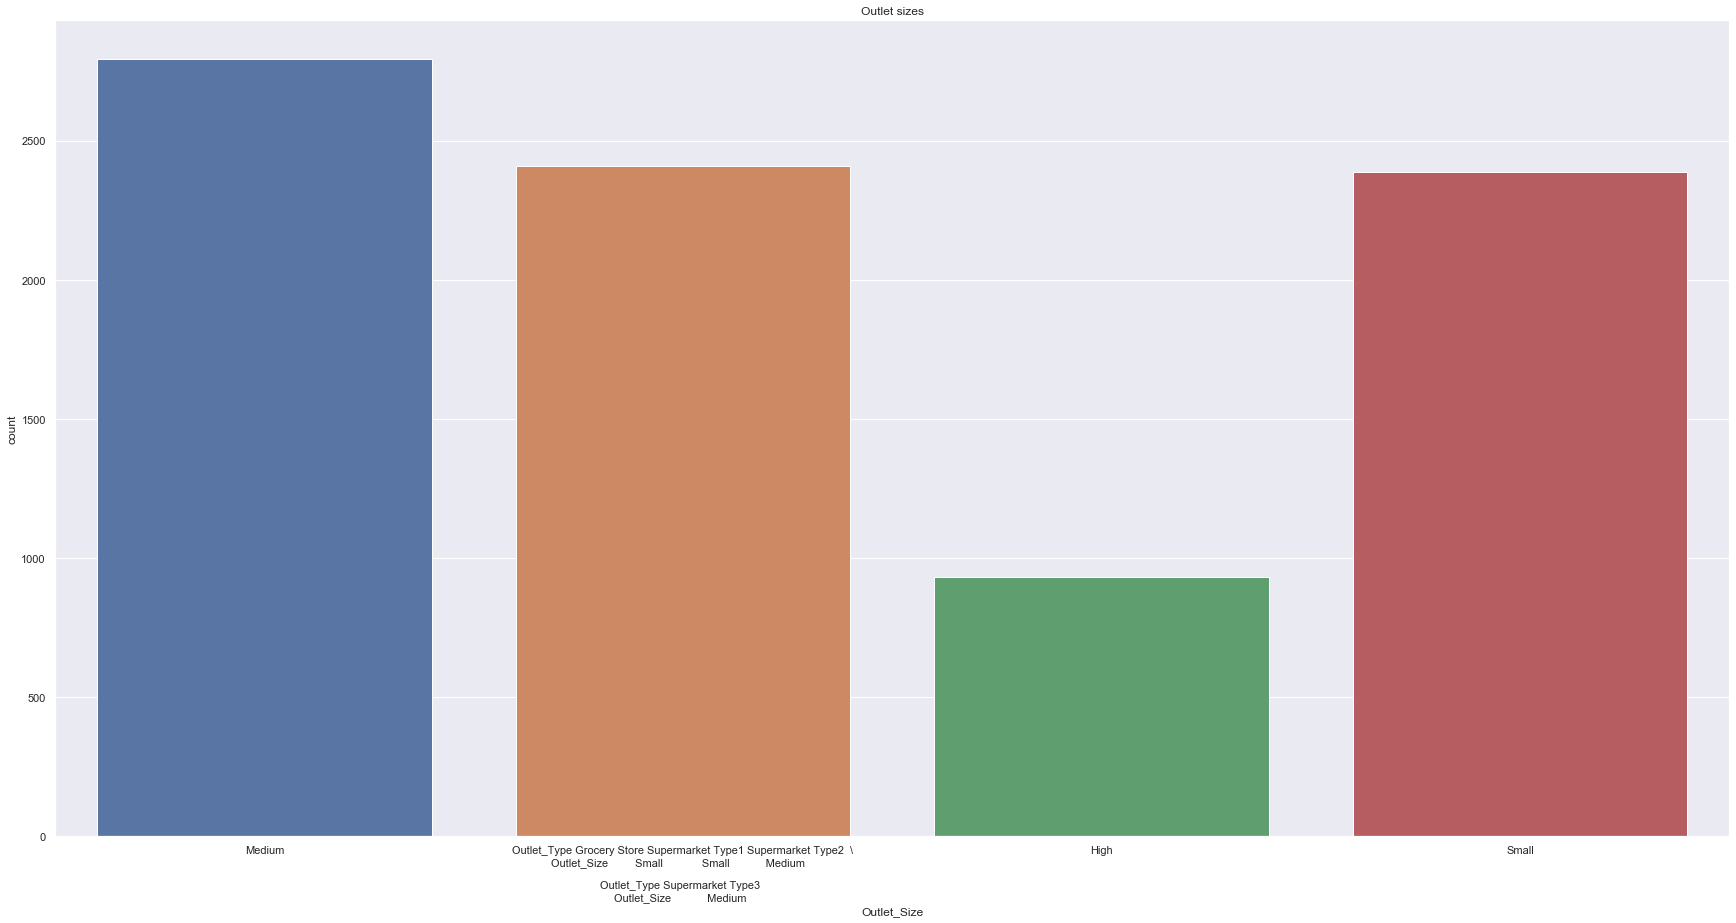

In [59]:
plt.figure(figsize=(30,15))
sns.countplot(x='Outlet_Size',data=bigmart_data)
             
plt.title("Outlet sizes")
plt.show()

### Data cleaning and pre processing 

##### Encoding

In [48]:
#encode categorical features

#cleaning the data

bigmart_data["Item_Fat_Content"].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [49]:
bigmart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [50]:
bigmart_data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [51]:
#Categorical values encoding to numerical values

encoder = LabelEncoder()

In [60]:
bigmart_data['Item_Identifier'] = encoder.fit_transform(bigmart_data['Item_Identifier'])

bigmart_data['Item_Fat_Content'] = encoder.fit_transform(bigmart_data['Item_Fat_Content'])

bigmart_data['Item_Type'] = encoder.fit_transform(bigmart_data['Item_Type'])

bigmart_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_data['Outlet_Identifier'])

bigmart_data['Outlet_Size'] = encoder.fit_transform(bigmart_data['Outlet_Size'])

bigmart_data['Outlet_Location_Type'] = encoder.fit_transform(bigmart_data['Outlet_Location_Type'])

bigmart_data['Outlet_Type'] = encoder.fit_transform(bigmart_data['Outlet_Type'])


In [61]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting Features and Target 

In [62]:
X = bigmart_data.drop(columns='Item_Outlet_Sales',axis = 1)

In [63]:
Y = bigmart_data['Item_Outlet_Sales']

In [64]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,3,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [65]:
Y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Train Test split 

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [67]:
print(X_train.shape,X_test.shape)

(6818, 11) (1705, 11)


## Training the Machine learning Model - XGBoost Regressor

In [82]:
regressor = XGBRegressor()

In [83]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [84]:
train_prediction = regressor.predict(X_train)

#### Evaluation

In [85]:
r2_train = metrics.r2_score(Y_train,train_prediction)

In [86]:
print('R squared value on train data : ',r2_train)

R squared value on train data :  0.8645959675073867


In [87]:
#Test data predictions

test_prediction = regressor.predict(X_test)

In [88]:
r2_test = metrics.r2_score(Y_test,test_prediction)
print("R squared value for test data : ",r2_test)

R squared value for test data :  0.5152503359077216
